# Installing and importing dependencies

In [1]:
# !pip install tensorflow==2.5.1 tensorflow-gpu==2.5.1 opencv-python mediapipe sklearn matplotlib

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# Collecting keypoints from mediapipe holistics

In [3]:
mp_holistic = mp.solutions.holistic  #we are bringing the holistic model of mideapipe
mp_drawing = mp.solutions.drawing_utils #we are also bringing the drawing utilities of mideapipe.

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(70,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(70,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(70,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(70,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [6]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        #here we are reading the feed
        ret,frame = cap.read()
        
        #make detections
        image,results = mediapipe_detection(frame,holistic)
        print(results)
        
        #drawing landmarks on real time
        draw_landmarks(image,results)
        
        #now we are showing the feed to the screen
        cv2.imshow("OpenCV Feed",image)

        #breaking the loop if we press q.
        if cv2.waitKey(10) & 0xFF==ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>


In [7]:
results.left_hand_landmarks

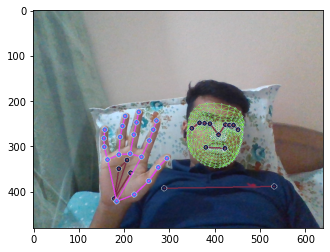

In [8]:
draw_landmarks(frame,results)
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# Extracting keypoints value

In [9]:
# results.pose_landmarks
# len(results.face_landmarks.landmark)
len(results.right_hand_landmarks.landmark)

21

In [10]:
pose = np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [11]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [12]:
extract_keypoints(results).shape
# 468*3+33*4+21*3+21*3

(1662,)

In [13]:
result_test = extract_keypoints(results)

In [14]:
result_test

array([ 0.63960528,  0.5724687 , -0.59538317, ...,  0.24707502,
        0.54907298, -0.04895746])

In [15]:
np.save('0',result_test)

In [16]:
np.load('0.npy')#load backup our array

array([ 0.63960528,  0.5724687 , -0.59538317, ...,  0.24707502,
        0.54907298, -0.04895746])

# Folder setup for data Collection

In [134]:
#path for exported data,numpy arrays
PATH = os.path.join("MP_Data")

#Actions that we are trying to detect
# 
actions =(['hello','goodbye','please','no','thanks','yes'])



#total number of sequences that we are trying to collect which is 30 videos worth of data
no_sequences = 30

#30 frames length of video
sequence_length = 30

#folder start
start_folder = 30

In [129]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(PATH,action,str(sequence)))
        except:
            pass

In [130]:
os.listdir()

['.ipynb_checkpoints',
 '0.npy',
 'action.h5',
 'Logs',
 'MP_Data',
 'SignLanguageDetection.ipynb']

# COLLECTING KEYPOINTS FOR TRAINING AND TESTING

In [131]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                #here we are reading the feed
                ret,frame = cap.read()

                #make detections
                image,results = mediapipe_detection(frame,holistic)

                #drawing landmarks on real time
                draw_landmarks(image,results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX , 1, (255, 0,0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX , 0.5, (0, 255,0), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX , 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [80]:
cap.release()
cv2.destroyAllWindows()

# Preprocessing our data

In [84]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [136]:
label_map = {label:num for num, label in enumerate(actions)}
label_map

{'hello': 0, 'goodbye': 1, 'please': 2, 'no': 3, 'thanks': 4, 'yes': 5}

In [137]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        video = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(PATH, action, str(sequence), "{}.npy".format(frame_num)))
            video.append(res)
        sequences.append(video)
        labels.append(label_map[action])

In [139]:
print(np.array(sequences).shape)
print(np.array(labels).shape)

(180, 30, 1662)
(180,)


In [140]:
X = np.array(sequences)
X.shape

(180, 30, 1662)

In [141]:
y = to_categorical(labels).astype(int)
y

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1]])

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
X_train.shape

(171, 30, 1662)

# Building and training LSTM DL Model

In [143]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import Dropout
# from tensorflow.keras.callbacks import TensorBoard
import tensorflow as tf

In [144]:
load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [145]:
log_dir = os.path.join('Logs')
# tb_callback = TensorBoard(log_dir=log_dir)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir, histogram_freq=1)

In [146]:
#instantiating our model
#here we are using media-pipe holistic and lstm model .
#less data is required,it is faster to train with 1.53 million parameters
model = Sequential()
model.add(LSTM(128, return_sequences=True, activation='tanh', input_shape=(30, 1662)))
model.add(Dropout(0.2))
model.add(LSTM(256, return_sequences=True, activation='tanh'))
model.add(Dropout(0.2))
model.add(LSTM(128, return_sequences=False, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(np.array(actions).shape[0], activation='softmax'))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [147]:
np.array(actions).shape

(6,)

In [148]:
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [149]:
model.fit(X_train, y_train, epochs=600, callbacks=[tensorboard_callback])

Epoch 1/600
6/6 [==============================] - 5s 243ms/step - loss: 1.8103 - accuracy: 0.1930
Epoch 2/600
6/6 [==============================] - 1s 137ms/step - loss: 1.8058 - accuracy: 0.1637
Epoch 3/600
6/6 [==============================] - 1s 136ms/step - loss: 1.6584 - accuracy: 0.2164
Epoch 4/600
6/6 [==============================] - 1s 131ms/step - loss: 1.3864 - accuracy: 0.3801
Epoch 5/600
6/6 [==============================] - 1s 130ms/step - loss: 1.6136 - accuracy: 0.2865
Epoch 6/600
6/6 [==============================] - 1s 138ms/step - loss: 1.2574 - accuracy: 0.3684
Epoch 7/600
6/6 [==============================] - 1s 135ms/step - loss: 1.1976 - accuracy: 0.3684
Epoch 8/600
6/6 [==============================] - 1s 134ms/step - loss: 1.3129 - accuracy: 0.3099
Epoch 9/600
6/6 [==============================] - 1s 182ms/step - loss: 1.1943 - accuracy: 0.3450
Epoch 10/600
6/6 [==============================] - 1s 182ms/step - loss: 1.1920 - accuracy: 0.3158
Epoch 11/

6/6 [==============================] - 1s 209ms/step - loss: 0.4384 - accuracy: 0.7485
Epoch 164/600
6/6 [==============================] - 1s 208ms/step - loss: 0.3900 - accuracy: 0.7778
Epoch 165/600
6/6 [==============================] - 1s 202ms/step - loss: 0.3659 - accuracy: 0.8538
Epoch 166/600
6/6 [==============================] - 1s 207ms/step - loss: 0.2281 - accuracy: 0.9474
Epoch 167/600
6/6 [==============================] - 1s 209ms/step - loss: 0.1820 - accuracy: 0.9591
Epoch 168/600
6/6 [==============================] - 1s 207ms/step - loss: 0.1340 - accuracy: 0.9766
Epoch 169/600
6/6 [==============================] - 1s 228ms/step - loss: 0.1508 - accuracy: 0.9708
Epoch 170/600
6/6 [==============================] - 1s 222ms/step - loss: 0.3196 - accuracy: 0.8655
Epoch 171/600
6/6 [==============================] - 1s 210ms/step - loss: 1.0700 - accuracy: 0.6550
Epoch 172/600
6/6 [==============================] - 1s 205ms/step - loss: 0.3983 - accuracy: 0.7836
Epoc

6/6 [==============================] - 1s 182ms/step - loss: 0.0294 - accuracy: 0.9942
Epoch 326/600
6/6 [==============================] - 1s 198ms/step - loss: 0.0334 - accuracy: 0.9942
Epoch 327/600
6/6 [==============================] - 1s 221ms/step - loss: 0.0247 - accuracy: 0.9942
Epoch 328/600
6/6 [==============================] - 1s 210ms/step - loss: 0.0343 - accuracy: 0.9942
Epoch 329/600
6/6 [==============================] - 1s 198ms/step - loss: 0.0317 - accuracy: 0.9942
Epoch 330/600
6/6 [==============================] - 1s 187ms/step - loss: 0.0322 - accuracy: 0.9942
Epoch 331/600
6/6 [==============================] - 1s 182ms/step - loss: 0.0246 - accuracy: 0.9942
Epoch 332/600
6/6 [==============================] - 1s 179ms/step - loss: 0.0260 - accuracy: 0.9942
Epoch 333/600
6/6 [==============================] - 1s 198ms/step - loss: 0.0232 - accuracy: 0.9942
Epoch 334/600
6/6 [==============================] - 1s 192ms/step - loss: 0.0222 - accuracy: 0.9942
Epoc

6/6 [==============================] - 1s 189ms/step - loss: 0.0163 - accuracy: 1.0000
Epoch 488/600
6/6 [==============================] - 1s 182ms/step - loss: 0.0311 - accuracy: 0.9942
Epoch 489/600
6/6 [==============================] - 1s 184ms/step - loss: 0.0328 - accuracy: 0.9942
Epoch 490/600
6/6 [==============================] - 1s 183ms/step - loss: 0.1521 - accuracy: 0.9532
Epoch 491/600
6/6 [==============================] - 1s 182ms/step - loss: 0.1573 - accuracy: 0.9357
Epoch 492/600
6/6 [==============================] - 1s 205ms/step - loss: 0.0547 - accuracy: 0.9708
Epoch 493/600
6/6 [==============================] - 1s 199ms/step - loss: 0.0236 - accuracy: 0.9942
Epoch 494/600
6/6 [==============================] - 1s 186ms/step - loss: 0.0129 - accuracy: 1.0000
Epoch 495/600
6/6 [==============================] - 1s 187ms/step - loss: 0.0167 - accuracy: 0.9942
Epoch 496/600
6/6 [==============================] - 1s 185ms/step - loss: 0.0164 - accuracy: 0.9942
Epoc

In [150]:
# tensorboard --logdir logs

In [151]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 30, 128)           916992    
_________________________________________________________________
dropout_8 (Dropout)          (None, 30, 128)           0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 30, 256)           394240    
_________________________________________________________________
dropout_9 (Dropout)          (None, 30, 256)           0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 128)               197120    
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)              

# Predicting result from test data

In [152]:
result = model.predict(X_test)

In [153]:
actions[np.argmax(result[1])]

'no'

In [154]:
actions[np.argmax(y_test[1])]

'no'

# Saving weights for future

In [155]:
tf.keras.models.save_model(model, 'C:/Users/KIIT/Desktop/8thSemProject/action.h5')

In [156]:
# del model

In [157]:
model.load_weights('action.h5')

# Accuracy Calculation and Evaluation using Confusion matrix

In [158]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [159]:
yhat = model.predict(X_test)

In [160]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [161]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[7, 0],
        [0, 2]],

       [[7, 0],
        [0, 2]],

       [[6, 0],
        [0, 3]],

       [[7, 0],
        [0, 2]]], dtype=int64)

In [162]:
accuracy_score(ytrue, yhat)

1.0